# Packages and Functions


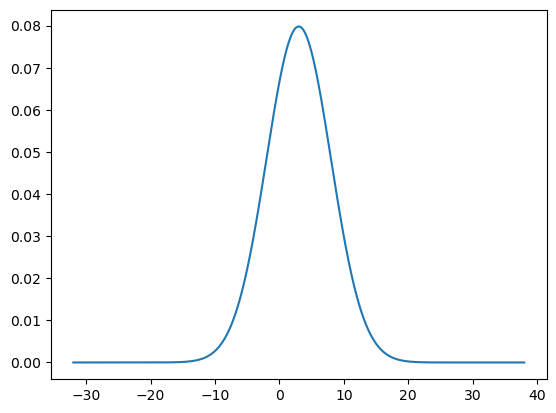

In [9]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd

import os
import sys

# Paths
os.chdir("/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/")
add_dir = "/Users/antoniosquicciarini/ownCloud/PhD Projects/General_Functions/"
sys.path.insert(1, add_dir)
add_dir = "/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/Programs"
sys.path.insert(1, add_dir)

#%% Upload an obj
def load_object(filename):
    with open(filename, 'rb') as file:
        obj = pickle.load(file)
    return obj 

time_signal = load_object("/Volumes/T7/EEG_Data/EEG_IM_objs/chb01__2023_2_6_19_21/chb01_04/chb01_04_seizure1.obj") #EOFError: Ran out of input

# Shannon verification with Gaussian Distr

sigm = 5
mean = 3
q = 3

x = np.linspace(-7*sigm+mean, 7*sigm+mean, 1000000)
delta = x[1]-x[0]
gaussian_function = 1/sigm * time_signal.Gaussian_Kernel((x-mean)/sigm)
plt.plot(x, gaussian_function)

SE_Num = time_signal.ShannonEntropy(gaussian_function, delta)
SEP_Num = np.exp(2*time_signal.ShannonEntropy(gaussian_function, delta))/(2*np.exp(1)*np.pi)
SE_Ana = 1/2 * np.log(2 * np.pi * np.e * sigm**2)
SEP_Ana = sigm**2

TS_Num = time_signal.TsallisEntropy(gaussian_function, delta, q)
TS_Ana = 1/(q-1) * (1 - 1/(q**(1/2) * ((2*np.pi)**(1/2) * sigm)**(q-1)) )

FI_Num = time_signal.FisherInformation(gaussian_function, delta)
FI_Ana = 1/sigm**2

In [17]:
SEP_Num*FI_Num


0.9999999997225625